In [1]:
import matplotlib.pyplot as plt

In [2]:
filename = 'scaling.txt'

In [3]:
configs = {}
current_config = None
with open(filename, 'r') as file:
    for line in file:
        line = line.strip()
        if line.startswith("# TL"):
            current_config = line.split()[1]
            configs[current_config] = {'cores': [], 'sypd': []}
        elif line and not line.startswith("#"):
            parts = line.split()
            nodes, cores, sypd, chpsy = map(float, parts)
            configs[current_config]['cores'].append(int(cores))
            configs[current_config]['sypd'].append(sypd)

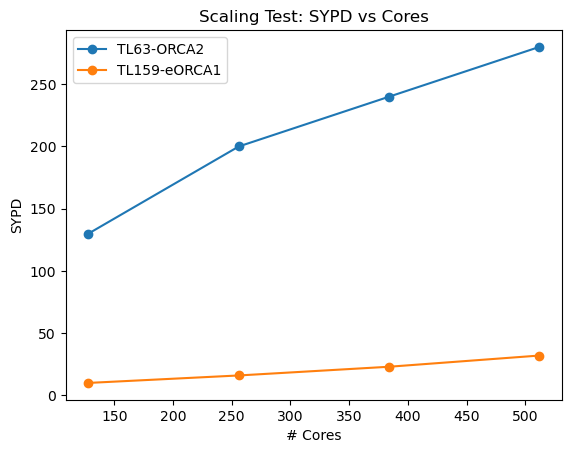

In [4]:
gridlist = ['TL63-ORCA2', 'TL159-eORCA1']
for grid in gridlist:
    values = configs[grid]
    plt.plot(values['cores'], values['sypd'], marker='o', label=grid)
plt.xlabel('# Cores')
plt.ylabel('SYPD')
plt.title('Scaling Test: SYPD vs Cores')
plt.legend()
#plt.grid(True)
plt.savefig('scaling.png')

In [6]:
values['cores'][0]

128

In [ ]:
gridlist = ['TL63-ORCA2', 'TL159-eORCA1']
for grid in gridlist:
    values = configs[grid]
    s0 = values['sypd'][0]
    nvalues = [sypd/s0 for sypd in values['sypd']]
    ivalues = [cores/128 for cores in values['cores']]
    plt.plot(values['cores'], nvalues, marker='o', label=grid)
plt.plot(values['cores'],ivalues, '-', label='Ideal scaling')
plt.xlabel('# Cores')
plt.ylabel('ΔSYPD')
plt.title('Scaling Test: SYPD vs Cores')
plt.legend()
#plt.grid(True)
plt.savefig('scaling.png')

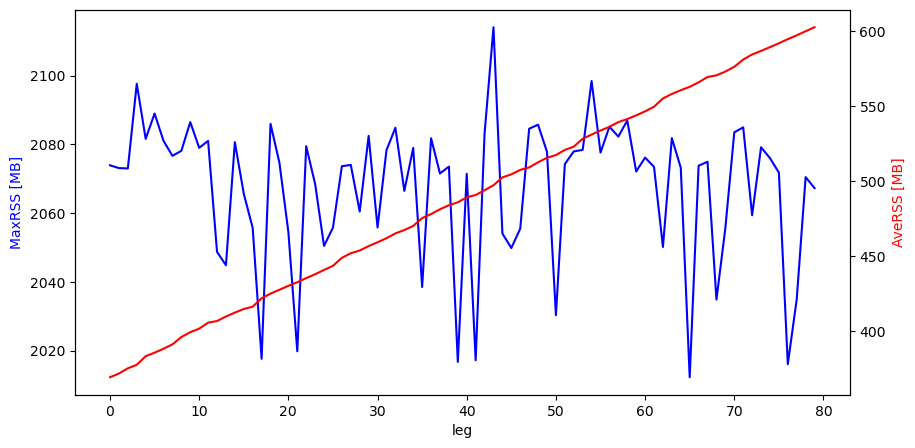

In [3]:
# Load data from file
filename = '/ec/res4/hpcperm/itas/ecearth4/jobs/FE01/rss_usage_results.txt'

# Lists to hold the data
indices = []
max_rss_mb = []
ave_rss_mb = []

with open(filename, 'r') as file:
    for index, line in enumerate(file):
        parts = line.split()
        indices.append(index)  # Use the row index as the x-axis value
        max_rss_mb.append(float(parts[1]))  # Assuming the values are in MB
        ave_rss_mb.append(float(parts[2]))  # Assuming the values are in MB

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot MaxRSS on the primary y-axis
ax1.plot(indices, max_rss_mb, 'b-', label='MaxRSS')
ax1.set_xlabel('leg')
ax1.set_ylabel('MaxRSS [MB]', color='b')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(indices, ave_rss_mb, 'r-', label='AveRSS')
ax2.set_ylabel('AveRSS [MB]', color='r')
ax2.tick_params(axis='y', labelcolor='black')

# Add a title and adjust layout
#fig.tight_layout()

# Save the figure
#plt.savefig('fig.png', format='png')

# Show the figure
plt.show()

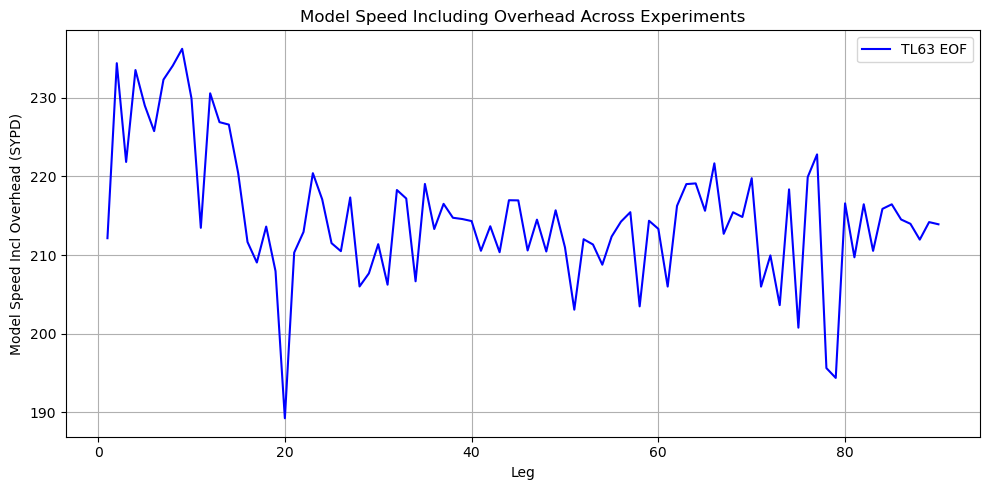

In [7]:
import os
import re
import matplotlib.pyplot as plt


# List of experiments
#expnames = ["lan0", "lan1", "gan0"]
expnames = ['FE01']
description = {
    "FE01": "TL63 EOF"
    #"lan0": "TL63 intel-openmpi oldtest", 
    #"lan1": "TL63 intel-openmpi",
    #"gan0": "TL63 gcc-openmpi"
}

# List of folder names (assuming they are the same for all experiments)

# Regex pattern to extract model speed including overhead
pattern = re.compile(r"Model speed incl overhead:\s+([\d.]+) SYPD")

# Initialize a dictionary to store speeds for each experiment
experiment_speeds = {exp: [] for exp in description.keys()}

# Loop over each experiment and extract model speeds
for expname in expnames:
    #base_dir = f"/lus/h2resw01/scratch/ccpd/ece4/{expname}/log"
    base_dir = f"/ec/res4/scratch/itas/ece4/{expname}/log"
    folders = sorted(os.listdir(base_dir))
    for folder in folders:
        filepath = os.path.join(base_dir, folder, 'timing.log')
        try:
            with open(filepath, 'r') as file:
                for line in file:
                    match = pattern.search(line)
                    if match:
                        model_speed = float(match.group(1))
                        experiment_speeds[expname].append((int(folder), model_speed))
                        break  # Stop reading after finding the first match
        except FileNotFoundError:
            print(f"File not found: {filepath}")

# Plotting
plt.figure(figsize=(10, 5))
colors = ['b', 'r', 'g', 'c', 'm', 'y']  # Different colors for each experiment

# Plot each experiment's data
for i, (expname, speeds) in enumerate(experiment_speeds.items()):
    folders, speed_values = zip(*speeds) if speeds else ([], [])
    plt.plot(folders, speed_values, linestyle='-', color=colors[i % len(colors)], label=f'{description[expname]}')

plt.xlabel('Leg')
plt.ylabel('Model Speed Incl Overhead (SYPD)')
plt.title('Model Speed Including Overhead Across Experiments')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the plot
#plt.savefig('model_speed_plot_multiple_experiments.png', format='png')

# Show the plot
plt.show()